In [1]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(string.printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [3]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words = stop_words+list(string.printable)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Categories: "For sale", "Electronics", "Religion"
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [5]:
# Fetch dataset
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

In [6]:
news_data['data'][:5]

['From: Steve@Busop.cit.wayne.edu (Steve Teolis)\nSubject: Re: *** TurboGrafx System For SALE ***\nOrganization: Wayne State University\nLines: 38\nDistribution: na\nNNTP-Posting-Host: 141.217.75.24\n\n>TurboGrafx-16 Base Unit (works like new) with:\n>       1 Controller\n>       AC Adapter\n>       Antenna hookup\n>     * Games:\n>         Kieth Courage\n>         Victory Run\n>         Fantasy Zone\n>         Military Madness\n>         Battle Royal\n>         Legendary Axe\n>         Blazing Lasers\n>         Bloody Wolf\n>\n>  --------------------------------------\n>* Will sell games separatley at $25 each\n>  --------------------------------------\n\nYour kidding, $210.00, man o man, you can buy the system new for $49.00 at \nElectronic Boutique and those games are only about $15 - $20.00 brand new.  \nMaybe you should think about that price again if you REALLY need the money.\n\n\n\n\n\n\n                        \n                        \n                        -=-=-=-=-=-=-=-

In [7]:
# Check the categories of the news articles
print(news_data.target)

[0 0 1 ... 0 1 0]


The target is the variable that we predict by making use of the rest of the variables in a dataset.

Here, 0 refers to misc.forsale, 1 refers to sci.electronics, and 2 refers to talk.religion.misc.

In [8]:
# To store news_data and the corresponding categories in a pandas DataFrame and view it, write the following code
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category' : news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [9]:
# Count the number of occurrences of each category
news_data_df['category'].value_counts()

1    591
0    585
2    377
Name: category, dtype: int64

Use a lambda function to extract tokens from each "text" of the news_data_df DataFrame. Check whether any of these tokens is a stop word, lemmatize the ones that are not stop words, and then concatenate them to recreate the sentence. Make use of the join function to concatenate a list of words into a single sentence. To replace anything other than letters, digits, and whitespaces with blank space, use a regular expression (re).

In [10]:
news_data_df['cleaned_text'] = news_data_df['text']\
.apply(lambda x : ' '.join\
       ([lemmatizer.lemmatize\
         (word.lower())\
         for word in word_tokenize\
         (re.sub(r'([^\s\w]|_)+', ' ',\
                 str(x))) if word.lower()\
         not in stop_words]))

Create a TFIDF matrix and transform it into a DataFrame.

In [11]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
# Calculate the distance
from sklearn.metrics.pairwise import euclidean_distances as euclidean
dist = 1 - euclidean(tfidf_df)

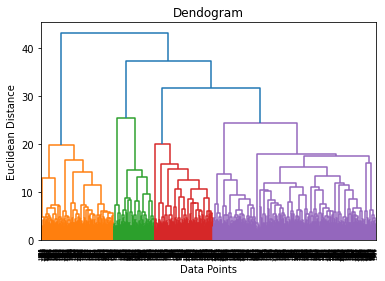

In [13]:
# Dendogram for TFIDF representation of documents
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(dist, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Dendogram')
plt.show()

Use the fcluster() function to obtain the cluster labels of the clusters that were obtained by hierarchical clustering

In [14]:
k = 4
clusters = fcluster(sch.linkage(dist, method='ward'), k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

Make use of the crosstab function of pandas to compare the clusters we have obtained with the actual categories of news articles.

In [15]:
news_data_df['obtained_clusters'] = clusters
pd.crosstab(news_data_df['category'].replace\
           ({0: 'misc.forsale', 1: 'sci.electronics', 2: 'talk.religion.misc'}),\
           news_data_df['obtained_clusters'].replace({1: 'cluster_1', 2: 'cluster_2', 3: 'cluster_3', 4: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,160,2,242,181
sci.electronics,123,3,29,436
talk.religion.misc,54,185,2,136


Crosstab between actual categories and obtained clusters 